<a href="https://colab.research.google.com/github/Aldirhezaldi/PCVK_Genap_2021/blob/main/UAS_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  import library yang dibutuhkan
from __future__ import print_function
import cv2 as cv
import argparse
import numpy as np
from matplotlib import pyplot as plt
import imutils as im
import os

#akses drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


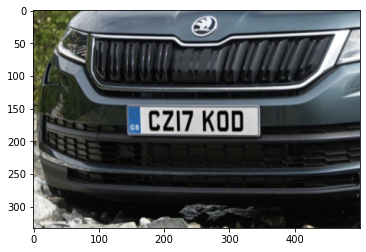

In [14]:
image = cv.imread('/content/drive/MyDrive/image/Cars109.png')
image = im.resize(image, width=500)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

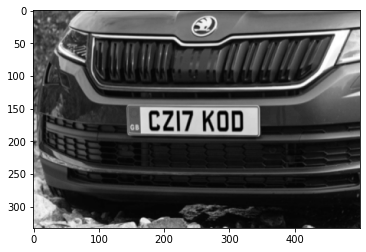

In [16]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

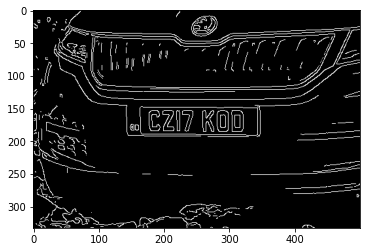

In [17]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

blur = cv.bilateralFilter(gray, 11, 17, 17)

edgeDet = cv.Canny(blur, 170, 200)
plt.imshow(edgeDet, cmap='gray')

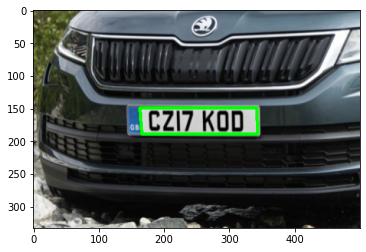

In [5]:
(cnts, _) = cv.findContours(edgeDet.copy(), cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv.contourArea, reverse = True)[:30]

NumberPlateCnt = None

count = 0
for c in cnts:
        peri = cv.arcLength(c, True)
        approx = cv.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:
            NumberPlateCnt = approx
            break

cv.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))